In [158]:
from setup import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

activities = pd.read_pickle('data/activities_small.pkl')

In [159]:
activities = remap_activity_datatypes(activities)

In [160]:
activities.type.unique()

array([u'Ride', u'Run', u'Workout', u'Hike', u'Swim', u'StandUpPaddling',
       u'Walk', u'EBikeRide', u'VirtualRide', u'BackcountrySki',
       u'Kitesurf', u'NordicSki', u'Snowshoe', u'WeightTraining',
       u'AlpineSki'], dtype=object)

In [161]:
mask = (activities['type'].isin(['Ride', 'Run'])) & (activities['distance'] != 0) 
df1 = activities[mask]

In [162]:
runs_df = df1.loc[activities.type == 'Run', :]
rides_df = df1.loc[activities.type == 'Ride', :]

In [163]:
df1.type.value_counts()

Ride    1858
Run      327
Name: type, dtype: int64

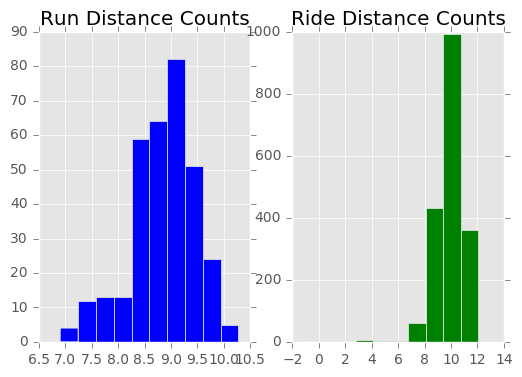

In [164]:
f, (ax1, ax2) = plt.subplots(1, 2)
runs = runs_df.distance.apply(lambda x: np.log(x), 1)
rides = rides_df.distance.apply(lambda x: np.log(x), 1)
ax1.hist(runs, color='blue')
ax1.set_title('Run Distance Counts')
ax2.hist(rides, color='green')
ax2.set_title('Ride Distance Counts')
plt.show()

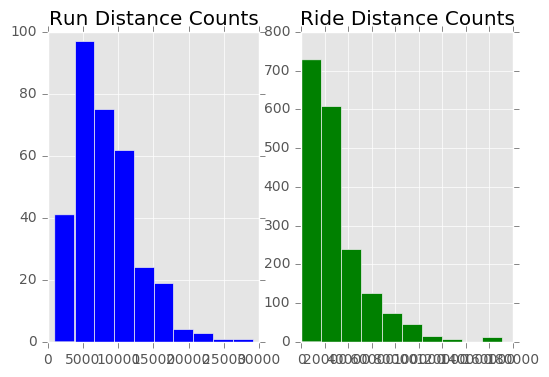

In [165]:
f, (ax1, ax2) = plt.subplots(1, 2)
runs_d = runs_df.distance
rides_d = rides_df.distance
ax1.hist(runs_d, color='blue')
ax1.set_title('Run Distance Counts')
ax2.hist(rides_d, color='green')
ax2.set_title('Ride Distance Counts')
plt.show()

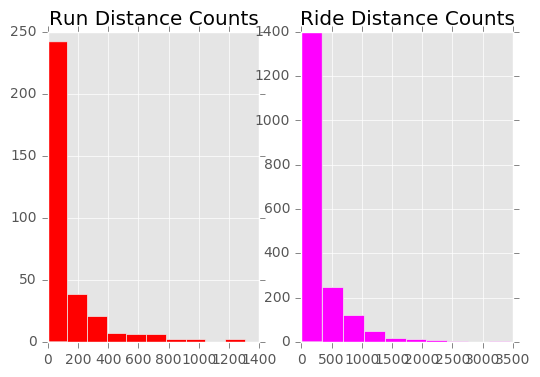

In [166]:
f, (ax1, ax2) = plt.subplots(1, 2)
runs_eg = runs_df.total_elevation_gain
rides_eg = rides_df.total_elevation_gain
ax1.hist(runs_eg, color='red')
ax1.set_title('Run Distance Counts')
ax2.hist(rides_eg, color='magenta')
ax2.set_title('Ride Distance Counts')
plt.show()

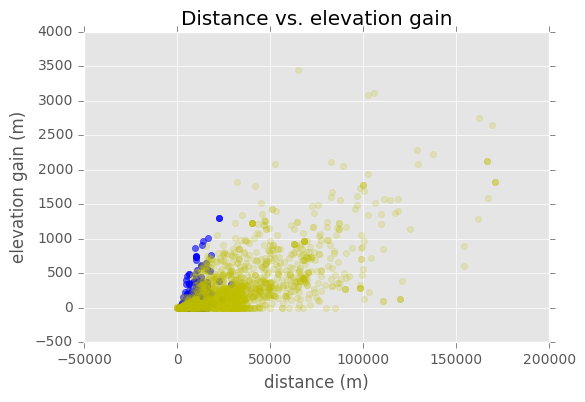

In [167]:
x_runs = runs_d.values
x_rides = rides_d.values
y_runs = runs_eg.values
y_rides = rides_eg.values
plt.scatter(x_runs, y_runs, color='b', alpha=.6)
plt.scatter(x_rides, y_rides, color='y', alpha=.2)
plt.xlabel('distance (m)')
plt.ylabel('elevation gain (m)')
plt.title('Distance vs. elevation gain')
plt.show()


In [174]:
df = pd.read_csv('data/activities_small.csv')

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2180 entries, 0 to 2179
Data columns (total 38 columns):
Unnamed: 0                2180 non-null int64
id                        2180 non-null int64
resource_state            2180 non-null int64
external_id               2180 non-null object
athlete                   1997 non-null float64
name                      2178 non-null object
distance                  2180 non-null float64
moving_time               2180 non-null float64
elapsed_time              2180 non-null float64
total_elevation_gain      2180 non-null float64
type                      2180 non-null object
start_date                2180 non-null object
start_date_local          2180 non-null object
timezone                  2180 non-null object
start_latlng              1836 non-null object
end_latlng                1836 non-null object
achievement_count         2180 non-null int64
kudos_count               2180 non-null int64
comment_count             2180 non-null int64
a